# Friction factor calculations for non-Newtonian fluids

## Import friction_factor.py python file from current directory (for now)

In [1]:
import numpy as np
import scipy.optimize as spo
import matplotlib.pyplot as plt

In [2]:
import rheopy.friction_factor_property as f

### Define a viscosity model for this example

In [3]:
def power_law(k,n,gammadot):
    return k*(gammadot+1.e-9)**(n-1.)

k = .1
n = .5
viscosity = lambda x: power_law(k,n,x)

diameter = .09738
length = 100.

### Instantiate (create) an object, a, of class friction_factor

The arguments are:
name = name of object chosen by user
rho = density in SI units (kg/m^3)
d = pipe diameter in SI units (m)
l = pipe length in SI units (m)
viscosity = function that returns viscosity given a shear rate (defined above)

In [4]:
a = f.friction_factor(name='test',rho=1000.,d=.09738,l=length,viscosity=viscosity)

### Case 1 - input average velocity, u, and compute pressure drop, Re, f, etc

u = 1 (m/s)

In [5]:
mdot = 200.0 # kg/min
density = 1000. # kg/m^3
q = mdot/60.0/density
u = q / (3.14159*(diameter/2.0)**2)

In [6]:
a.u = u

In [7]:
a.u

0.44755837705026

In [8]:
print(a)

Name= test
Diameter = 0.09738
Length = 100.0
Density = 1000.0
U = 0.44755837705026
Pressure drop = 2958.7020853480603
Friction factor = 0.007191866741121529
Reynolds number = 3139.283065162426
Wall shear rate = 51.882636029577945
Wall shear stress = 0.7202960226779853



In [9]:
a.u = .44756

In [10]:
print(a)

Name= test
Diameter = 0.09738
Length = 100.0
Density = 1000.0
U = 0.44756
Pressure drop = 2958.7150011947024
Friction factor = 0.007191845977661423
Reynolds number = 3139.308153125925
Wall shear rate = 51.883089004958286
Wall shear stress = 0.7202991670408503



In [11]:
a.pressure_drop = 2000.

In [12]:
a.pressure_drop

2000.0

In [13]:
a.u

0.28857541728488334

In [14]:
print(a)

Name= test
Diameter = 0.09738
Length = 100.0
Density = 1000.0
U = 0.28857541728488334
Pressure drop = 2000.0
Friction factor = 0.011693677319511394
Reynolds number = 1368.260775700697
Wall shear rate = 23.707161000999996
Wall shear stress = 0.4869



### Case 2 - input pressure drop and compute u, Re, f, etc

delta P = 1011.9 (Pa)

In [15]:
a.pressure_drop = 1011.9

### Each variable printed above may be accessed

In [16]:
a.u

0.0738710943546957

In [17]:
a.pressure_drop

1011.9

In [18]:
a.f

0.0902876407114031

In [19]:
a.re

177.21140871376156

In [20]:
a.d

0.09738

In [21]:
a.l

100.0

## Convergence challenges

/Users/whhiv/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


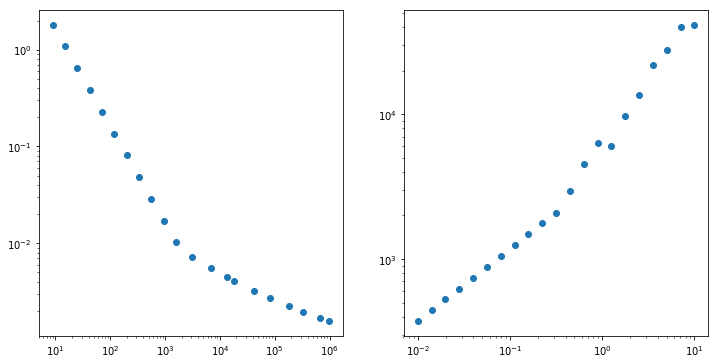

In [22]:
u_list = np.logspace(-2,1,21)
dp_list = []
f_list = []
re_list = []
for u in u_list:
    a.u = u
    dp_list.append(a.pressure_drop)
    re_list.append(a.re)
    f_list.append(a.f)
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.loglog(re_list,f_list,'o')
plt.subplot(122)
plt.loglog(u_list,dp_list,'o')